# Table of Contents
   1. Business Statement   
      1.1 About Data Set
   2. Introduction 
   3. Installing Libraries 
   4. Reading Data Set
   5. Machine Learning Models 
   6. Summary

# 1. Business Statement 

## 1.1 Drinking Water Quality
Dataset Shape: 3276 rows x 10 columns

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Columns Types:
1. Continuous: 10
   - Explanatory Variables: 9 - float64
   - Target Variable: 1 - int64 
2. Categorical: 0

# Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

# Importing Important Dependencies 

In [1]:
!pip install yellowbrick catboost lightgbm xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, fbeta_score
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, PrecisionRecallCurve
import warnings
warnings.filterwarnings("ignore")

# Reading Data Set

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
missing = [col for col in df.columns if df[col].isnull().any()]

df_plus = df.copy()

for col in missing:
    df_plus[col + 'missing'] = df_plus[col].isnull()
    
my_imputer = SimpleImputer()
imputed_df = pd.DataFrame(my_imputer.fit_transform(df_plus))

imputed_df.columns = df_plus.columns

In [10]:
imputed_df.isnull().sum()

ph                        0
Hardness                  0
Solids                    0
Chloramines               0
Sulfate                   0
Conductivity              0
Organic_carbon            0
Trihalomethanes           0
Turbidity                 0
Potability                0
phmissing                 0
Sulfatemissing            0
Trihalomethanesmissing    0
dtype: int64

In [11]:
imputed_df.Potability.value_counts() #imbalanced dataset

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [12]:
X = imputed_df.drop('Potability', axis=1)
y = imputed_df['Potability']

In [13]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .3, random_state = 2022)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
colors= ["YlGnBu", "Blues", "BuPu", "Greens", "PiYG"]
rnd.choice(colors)

'PiYG'

# Machine Learning Models:

1. Logistic Regression
2. Decision Tree
3. Gaussian Naive Bayes
4. Random Forest
5. K-Nearest Neighbors
6. Support Vector Machine
7. Stochastic Gradient Descent
8. AdaBoost
9. Extreme Gradient Boosting
10. Light Gradient Boosting Machine
11. CatBoost

# Metrics used: Accuracy Score, F-Beta Score, Classification Report, Confusion Matrix, ROCAUC Curve, Precision-Recall Curve

# Logistic Regression

In [16]:
#Created an obj for logistic regression 
log_reg = LogisticRegression(random_state = 10)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [17]:
#Training Accuracy
log_reg.score(X_train, y_train)

0.6066288704753597

In [18]:
#Testing Accuracy
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred) 

0.6225839267548321

In [19]:
fbeta_score(y_test, y_pred, beta = 1)

0.02624671916010499

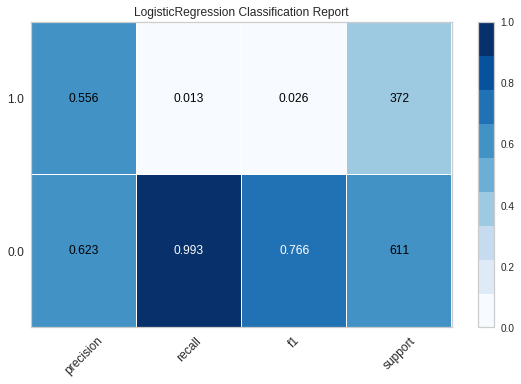

In [20]:
visualizer = ClassificationReport(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

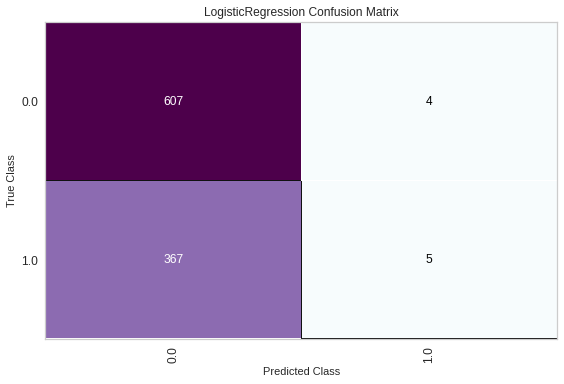

In [21]:
visualizer = ConfusionMatrix(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

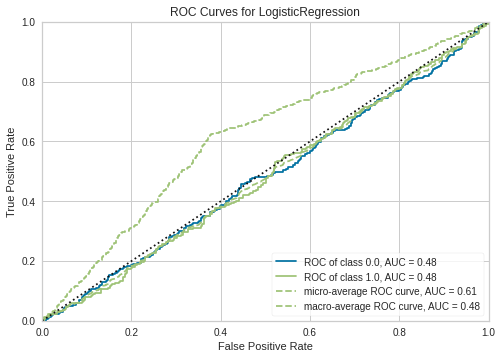

In [22]:
visualizer = ROCAUC(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

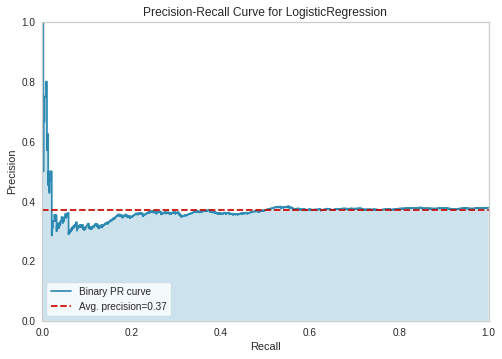

In [23]:
visualizer = PrecisionRecallCurve(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Decision Tree

In [24]:
#Created an obj for Decision Tree 
dec_tree = DecisionTreeClassifier(max_depth = 25, min_samples_split = 5, random_state = 10)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_split=5, random_state=10)

In [25]:
#Training Accuracy
dec_tree.score(X_train, y_train)

0.9651112080244222

In [26]:
#Testing Accuracy
y_pred = dec_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.5625635808748728

In [27]:
fbeta_score(y_test, y_pred, beta = 1)

0.4430051813471502

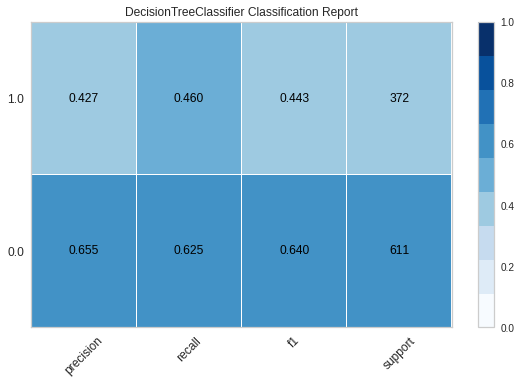

In [28]:
visualizer = ClassificationReport(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

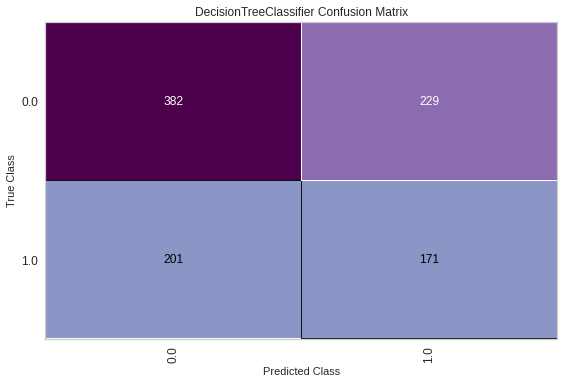

In [29]:
visualizer = ConfusionMatrix(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

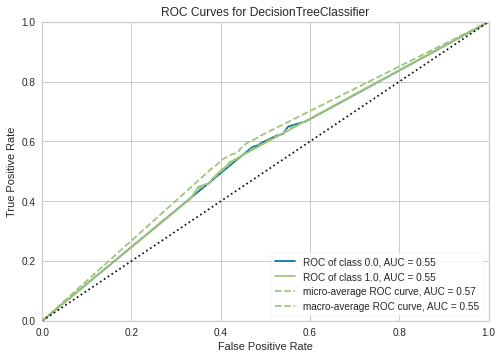

In [30]:
visualizer = ROCAUC(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

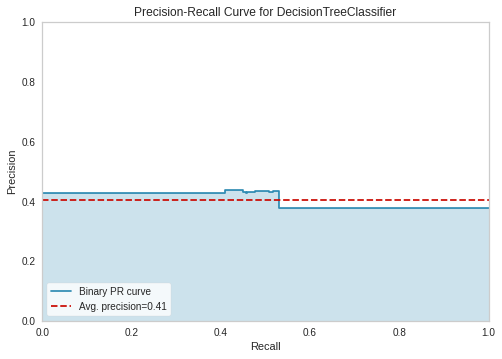

In [31]:
visualizer = PrecisionRecallCurve(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Gaussian Naive Bayes

In [32]:
#Created an obj for Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
#Training Accuracy
gnb.score(X_train, y_train)

0.6258177060619277

In [34]:
#Testing Accuracy
y_pred = gnb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

In [35]:
fbeta_score(y_test, y_pred, beta = 1)

0.3981481481481482

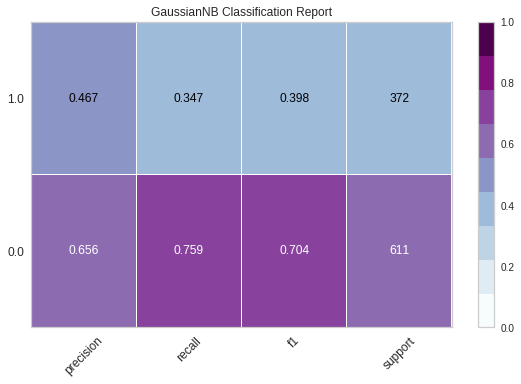

In [36]:
visualizer = ClassificationReport(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

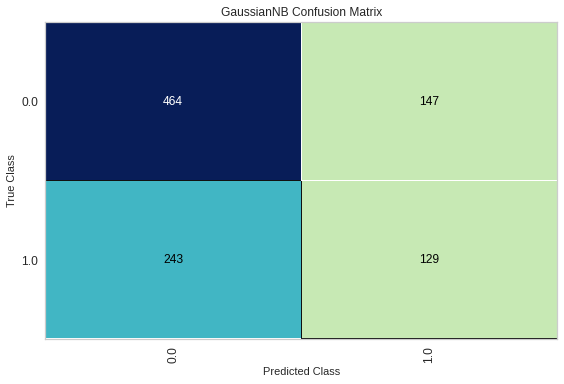

In [37]:
visualizer = ConfusionMatrix(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

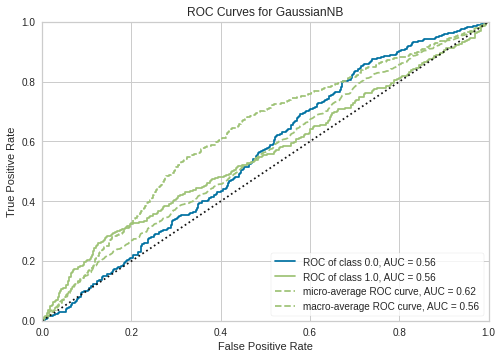

In [38]:
visualizer = ROCAUC(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

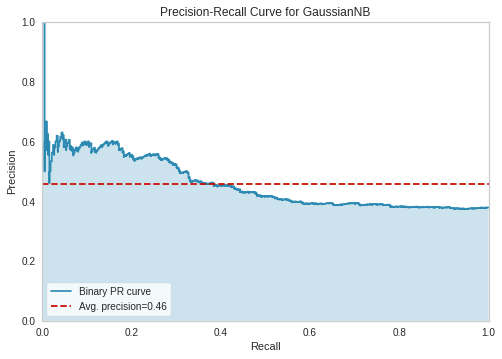

In [39]:
visualizer = PrecisionRecallCurve(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Random Forest

In [40]:
#Created an obj for Random Forest
rand_for = RandomForestClassifier(n_jobs = None, max_depth = 25, min_samples_split = 5, random_state = 10, n_estimators= 200)
rand_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [41]:
#Training Accuracy
rand_for.score(X_train, y_train)

0.9995638901003053

In [42]:
#Testing Accuracy
y_pred = rand_for.predict(X_test)
accuracy_score(y_test, y_pred) 

0.6653102746693794

In [43]:
fbeta_score(y_test, y_pred, beta = 1)

0.42582897033158806

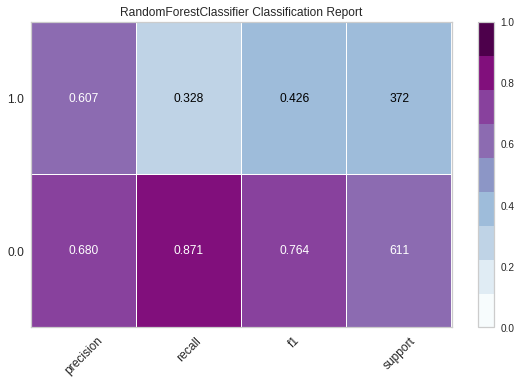

In [44]:
visualizer = ClassificationReport(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

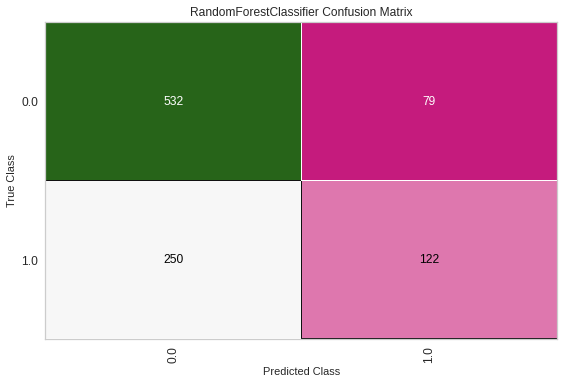

In [45]:
visualizer = ConfusionMatrix(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

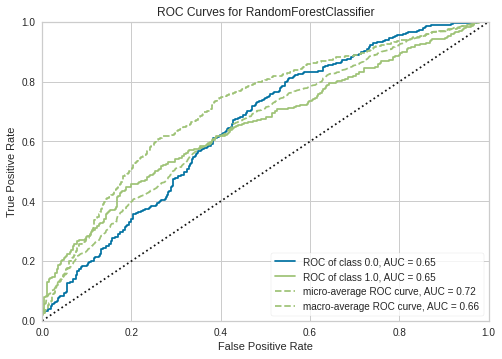

In [46]:
visualizer = ROCAUC(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

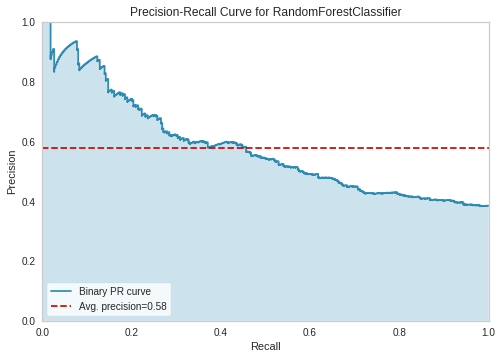

In [47]:
visualizer = PrecisionRecallCurve(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# K-Nearest Neighbors

In [48]:
#Created an obj for K - Nearest Neighbors
knc = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [49]:
#Training Accuracy
knc.score(X_train, y_train)

0.7278674225904928

In [50]:
#Testing Accuracy
y_pred = knc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6500508646998983

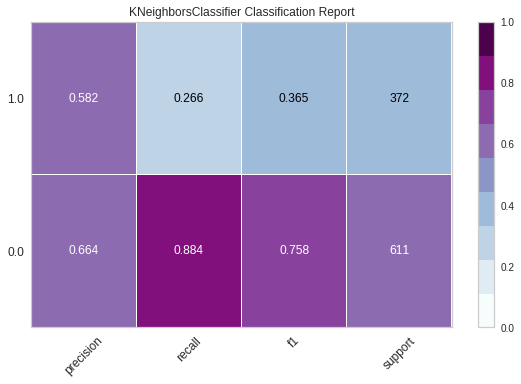

In [51]:
visualizer = ClassificationReport(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

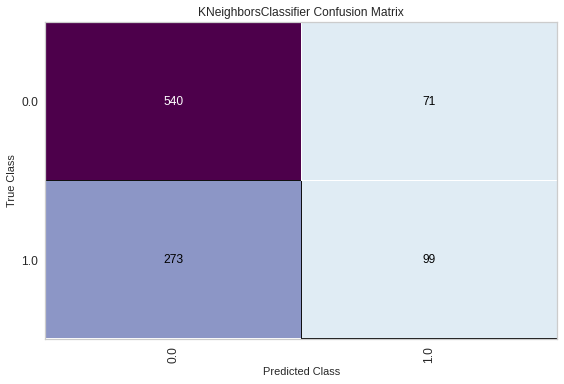

In [52]:
visualizer = ConfusionMatrix(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

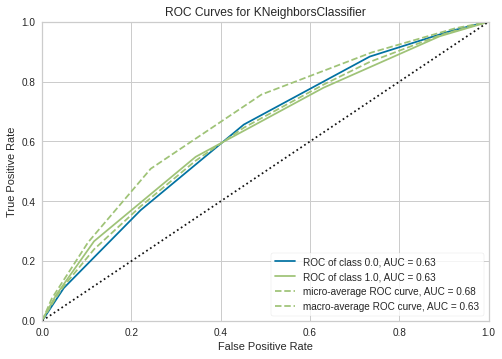

In [53]:
visualizer = ROCAUC(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

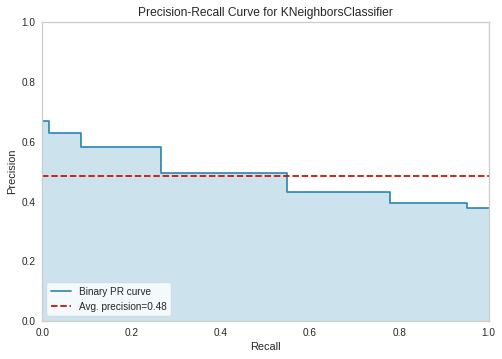

In [54]:
visualizer = PrecisionRecallCurve(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Support Vector Machine

In [55]:
#Created an obj for SVM
svm = SVC(C = 0.25, kernel = 'linear', random_state = 10)
svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=10)

In [56]:
#Training Accuracy
svm.score(X_train, y_train)

0.604884430876581

In [57]:
#Testing Accuracy
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.6215666327568667

In [58]:
fbeta_score(y_test, y_pred, beta = 1)

0.0

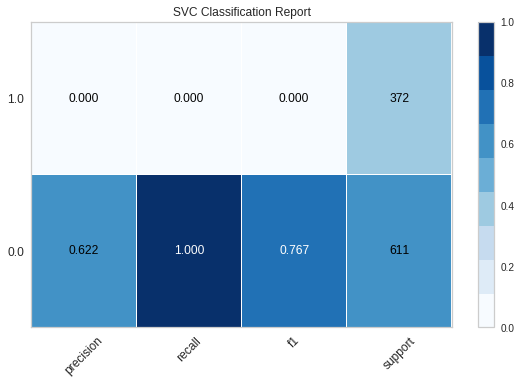

In [59]:
visualizer = ClassificationReport(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

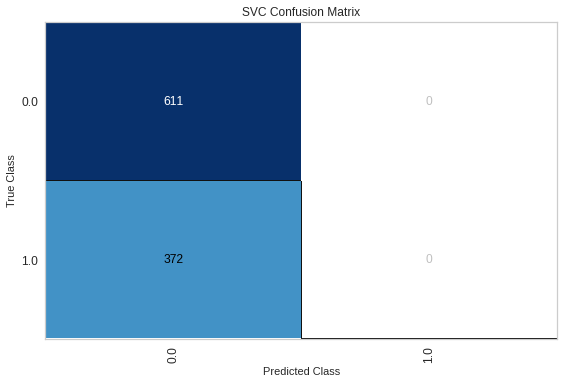

In [60]:
visualizer = ConfusionMatrix(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

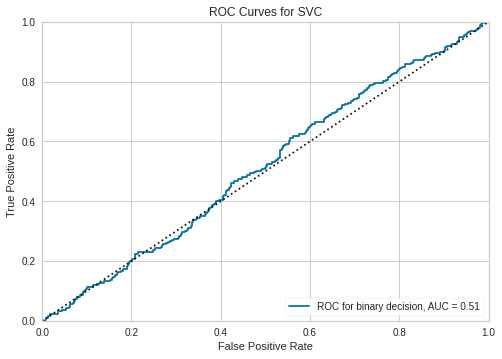

In [61]:
visualizer = ROCAUC(svm, support = True, color_bar = True, cmap = rnd.choice(colors), binary = True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

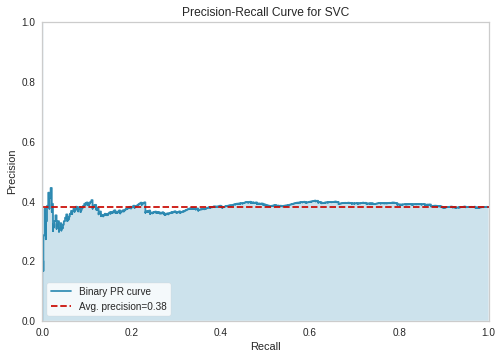

In [62]:
visualizer = PrecisionRecallCurve(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Stochastic Gradient Descent

In [63]:
#Created an obj for SGD
sgd = SGDClassifier(loss = 'modified_huber', max_iter = 2000, shuffle = False, n_jobs = None, early_stopping = False, random_state = 10)
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', max_iter=2000, random_state=10,
              shuffle=False)

In [64]:
#Training Accuracy
sgd.score(X_train, y_train)

0.6061927605756651

In [65]:
#Testing Accuracy
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.6164801627670397

In [66]:
fbeta_score(y_test, y_pred, beta = 1)

0.1677704194260486

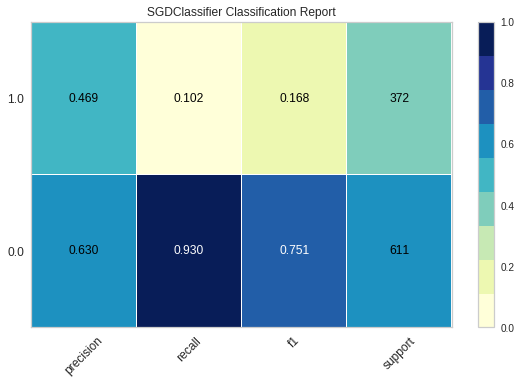

In [67]:
visualizer = ClassificationReport(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

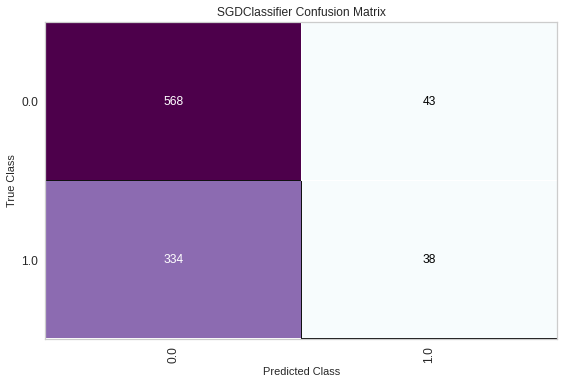

In [68]:
visualizer = ConfusionMatrix(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

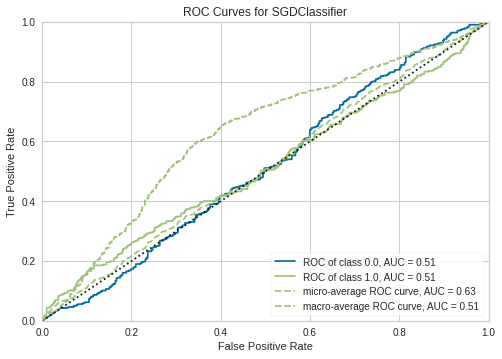

In [69]:
visualizer = ROCAUC(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

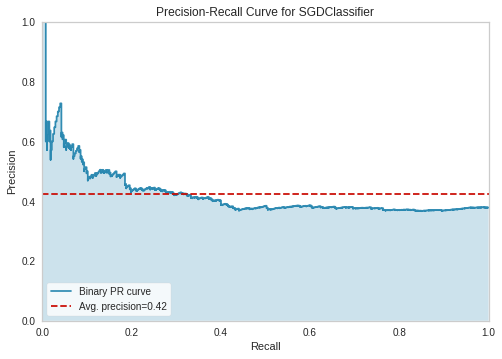

In [70]:
visualizer = PrecisionRecallCurve(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Ada Boost

In [71]:
#Created an obj for Ada Boost
adab = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1 , random_state = 10)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [72]:
#Training Accuracy
adab.score(X_train, y_train)

0.6532926297426952

In [73]:
#Testing Accuracy
y_pred = adab.predict(X_test)
accuracy_score(y_test, y_pred)

0.6317395727365208

In [74]:
fbeta_score(y_test, y_pred, beta = 1)

0.22978723404255322

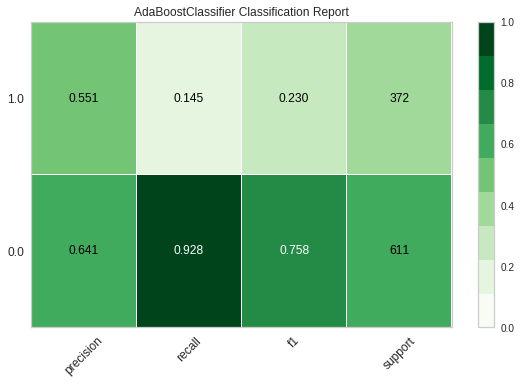

In [75]:
visualizer = ClassificationReport(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

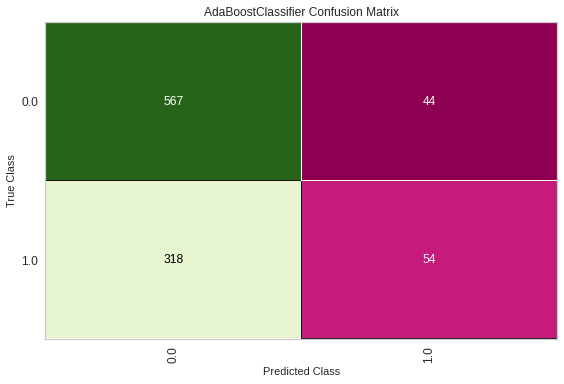

In [76]:
visualizer = ConfusionMatrix(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

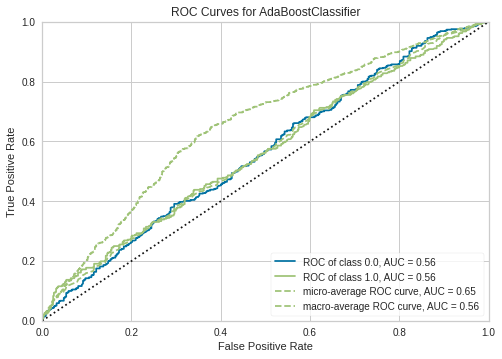

In [77]:
visualizer = ROCAUC(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

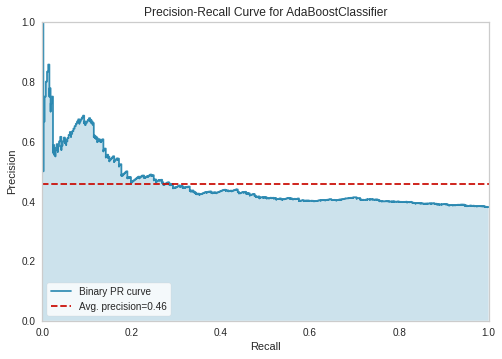

In [78]:
visualizer = PrecisionRecallCurve(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Extreme Gradient Boosting

In [79]:
#Created an obj for Extreme Gradient Boosting
xgb = XGBClassifier(tree_method = 'gpu_hist', n_estimators = 200, learning_rate = 0.1 , random_state = 10)
xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=200, random_state=10, tree_method='gpu_hist')

In [80]:
#Training Accuracy
xgb.score(X_train, y_train)

0.806367204535543

In [81]:
#Testing Accuracy
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6429298067141404

In [82]:
fbeta_score(y_test, y_pred, beta = 1)

0.4236453201970444

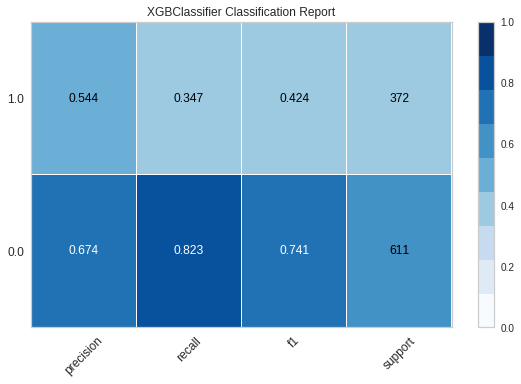

In [83]:
visualizer = ClassificationReport(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

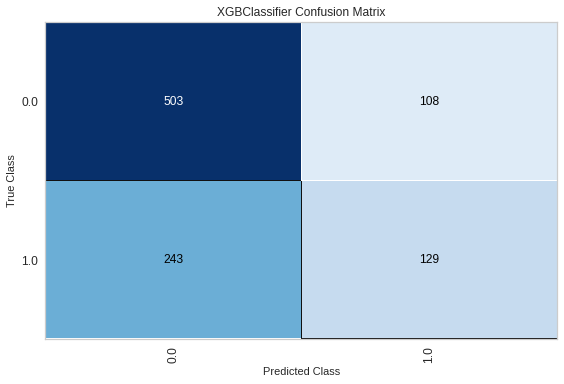

In [84]:
visualizer = ConfusionMatrix(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

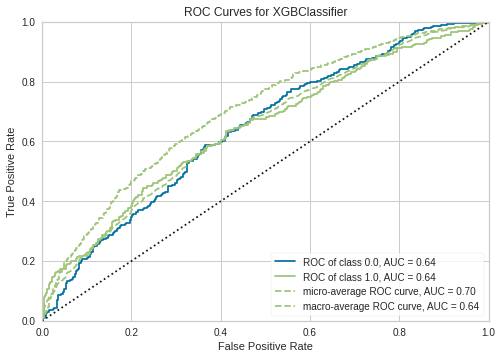

In [85]:
visualizer = ROCAUC(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

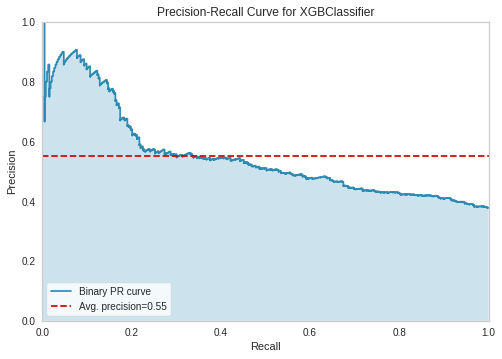

In [86]:
visualizer = PrecisionRecallCurve(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Light Gradient Boosting Machine

In [87]:
#Created an obj for Light Gradient Boosting Machine
lgbm = LGBMClassifier(n_estimators = 200, num_leaves = 255, objective = 'binary', num_iterations = 1000, n_jobs = -1, max_depth = 5, random_state = 10)
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=200, num_iterations=1000,
               num_leaves=255, objective='binary', random_state=10)

In [88]:
#Training Accuracy
lgbm.score(X_train, y_train)

1.0

In [89]:
#Testing Accuracy
y_pred = lgbm.predict(X_test)
accuracy_score(y_test, y_pred)

0.6378433367243134

In [90]:
fbeta_score(y_test, y_pred, beta = 1)

0.4733727810650888

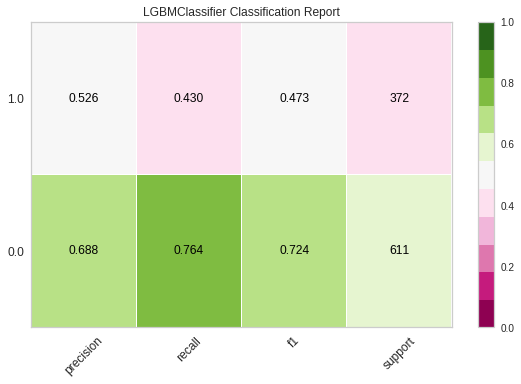

In [91]:
visualizer = ClassificationReport(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

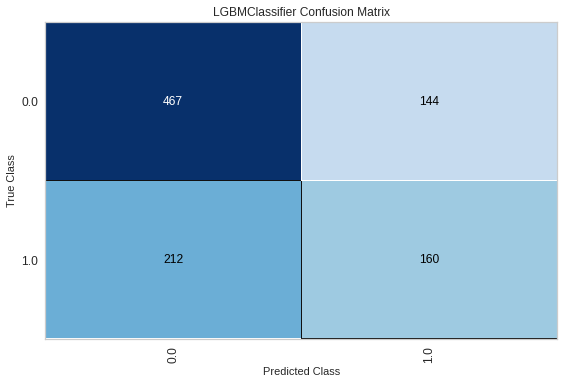

In [92]:
visualizer = ConfusionMatrix(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

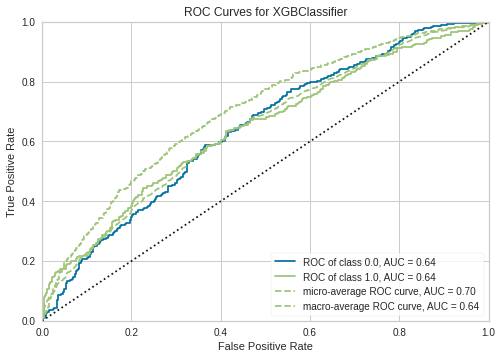

In [93]:
visualizer = ROCAUC(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

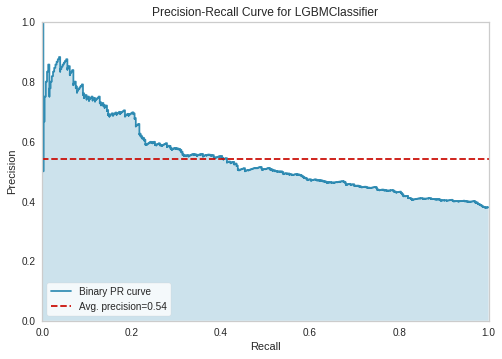

In [94]:
visualizer = PrecisionRecallCurve(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# CatBoost

In [95]:
#Created an obj for Cat Boost
cat = CatBoostClassifier(task_type = "GPU", iterations = 1000, loss_function = 'Logloss', eval_metric ='Accuracy', random_state = 10, early_stopping_rounds = 100, od_type = "Iter")
cat.fit(X_train, y_train, early_stopping_rounds = 100)

Learning rate set to 0.032207
0:	learn: 0.6480593	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.6563454	total: 198ms	remaining: 1m 38s
2:	learn: 0.6563454	total: 300ms	remaining: 1m 39s
3:	learn: 0.6637593	total: 378ms	remaining: 1m 34s
4:	learn: 0.6676843	total: 523ms	remaining: 1m 43s
5:	learn: 0.6698648	total: 650ms	remaining: 1m 47s
6:	learn: 0.6720454	total: 752ms	remaining: 1m 46s
7:	learn: 0.6685565	total: 818ms	remaining: 1m 41s
8:	learn: 0.6655037	total: 855ms	remaining: 1m 34s
9:	learn: 0.6720454	total: 967ms	remaining: 1m 35s
10:	learn: 0.6711731	total: 1.01s	remaining: 1m 31s
11:	learn: 0.6724815	total: 1.12s	remaining: 1m 31s
12:	learn: 0.6729176	total: 1.24s	remaining: 1m 34s
13:	learn: 0.6724815	total: 1.36s	remaining: 1m 35s
14:	learn: 0.6724815	total: 1.4s	remaining: 1m 31s
15:	learn: 0.6694287	total: 1.47s	remaining: 1m 30s
16:	learn: 0.6694287	total: 1.57s	remaining: 1m 30s
17:	learn: 0.6733537	total: 1.68s	remaining: 1m 31s
18:	learn: 0.6729176	total: 1.78s	remaining: 

In [96]:
#Training Accuracy
cat.score(X_train, y_train)

0.8874836458787615

In [97]:
#Testing Accuracy
y_pred = cat.predict(X_test)
accuracy_score(y_test, y_pred)

0.6622583926754833

In [98]:
fbeta_score(y_test, y_pred, beta = 1)

0.4696485623003195

In [99]:
cat = wrap(cat)

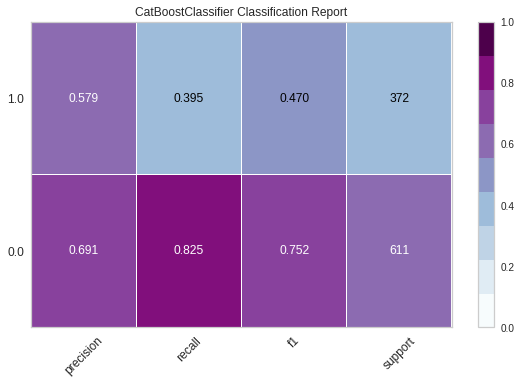

In [100]:
visualizer = ClassificationReport(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

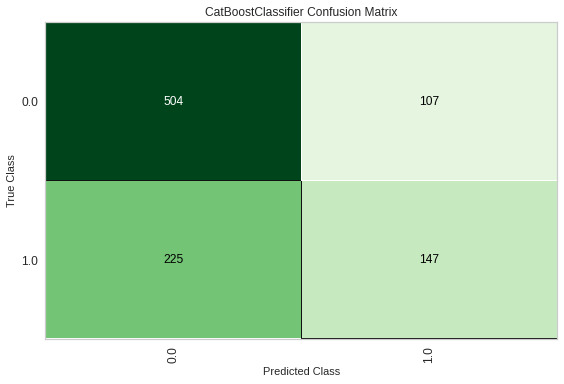

In [101]:
visualizer = ConfusionMatrix(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

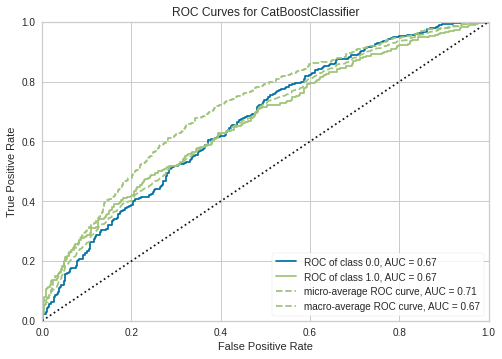

In [102]:
visualizer = ROCAUC(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

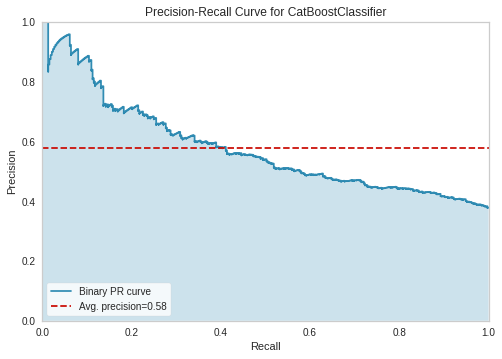

In [103]:
visualizer = PrecisionRecallCurve(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()